# Text Classification - Spam Detection

A common use for binary classification is sorting spam e-mails from legitimate e-mails. Machine-learning models that classify e-mails as spam or not spam typically use the [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) learning algorithm because it has proven to be effective at identifying spam, even with relatively small training sets. Let's build a Naive Bayes classification model and train it with 1,000 e-mails labeled with 0s (for not spam) and 1s (for spam) and then run a few e-mails through it to see how well it performs.

## Load and prepare the data

The first step is to load the dataset and prepare it for use in machine learning. Because machine-learning models only deal with numbers, we'll use Scikit-learn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class to vectorize the text in the training e-mails. Then we'll split the data for training and testing.

In [1]:
import pandas as pd

df = pd.read_csv('Data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


Check for duplicate rows in the dataset.

In [2]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  see how much more wealth you build with mortga...    1

The dataset contains one duplicate row. Let's remove it and check for balance.

In [3]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  performance reviewsour records indicate you ha...    1
1        500    500  see how much more wealth you build with mortga...    1

Use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to vectorize the text in the DataFrame's "Text" column using Scikit's built-in dictionary of English stop words.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

Split the dataset so that 80% can be used for training and 20% for testing.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

## Train a Naive Bayes classifier

The next step is to train a Naive Bayes classifier. We'll use scikit-learn's [MultinomialDB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier, which is ideal for datasets vectorized by `CountVectorizer`.

In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Validate the trained model with the 20% of the dataset aside for testing and show a confusion matrix.

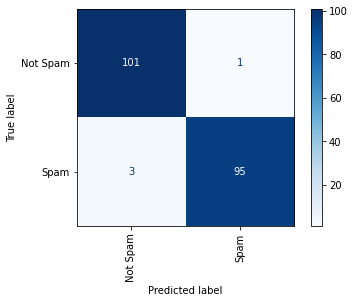

In [7]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Not Spam', 'Spam'],
                   cmap='Blues', xticks_rotation='vertical')

The model correctly identified 101 of 102 legitimate e-mails as not spam, and 95 of 98 spam e-mails as spam. Use the `score` method to get a rough measure of the model's accuracy.

In [8]:
model.score(x_test, y_test)

0.98

Use Scikit’s [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) class to visualize the ROC curve.

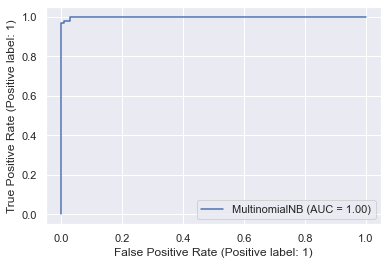

In [9]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()

rcd.from_estimator(model, x_test, y_test)

The results are encouraging. Trained with just 999 samples, the model is more than 99.9% accurate at classifying e-mails as spam or not spam when the proper threshold is selected.

## Use the model to classify e-mails

Now let's see how the model classifies some sample e-mails. We'll start with a message that is not spam. The model's `predict` method predicts a class: 0 for not spam, or 1 for spam.

In [10]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

What is the probability that the message is not spam? We can get that by calling `predict_proba`, which returns an array containing two values: the probability that the predicted class is 0, and the probability that the predicted class is 1, in that order.

In [11]:
model.predict_proba(input)[0][0]

0.9999497111473539

Now test the model with a spam message.

In [12]:
msg = 'Why pay more for expensive meds when you can order them online and save $$$?'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

What is the probability that the message is not spam?

In [13]:
model.predict_proba(input)[0][0]

0.00021423891260677753

What is the probability that the message IS spam?

In [14]:
model.predict_proba(input)[0][1]

0.9997857610873945

Observe that `predict` and `predict_proba` accept an array of inputs. Based on that, could you classify an entire batch of e-mails with one call to `predict` or `predict_proba`? How would you get the results for each e-mail?